# Intsalling PyTorch and all the depedencies

In [97]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
Note: you may need to restart the kernel to use updated packages.


In [98]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [99]:
!cd yolov5 & pip install -r requirements.txt

In [100]:
!python.exe -m pip install --upgrade pip

In [101]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Load Model

In [102]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\vinay/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-14 Python-3.9.13 torch-1.13.1+cu116 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [103]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [104]:
img  = 'https://img.olympics.com/images/image/private/t_s_w1340/t_s_16_9_g_auto/f_auto/primary/ngdjbafv3twathukjbq2'

# Make Detections with Images

In [105]:
results = model(img)
results.print()

image 1/1: 753x1340 5 persons
Speed: 748.4ms pre-process, 125.8ms inference, 30.3ms NMS per image at shape (1, 3, 384, 640)


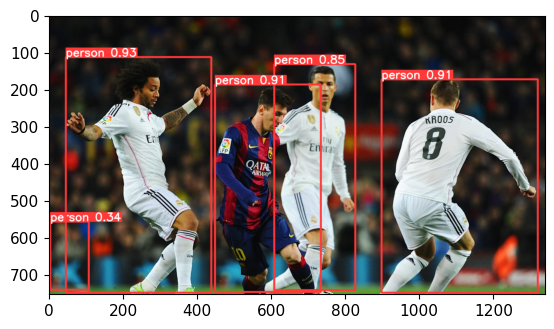

In [106]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Making Detection From a Recorded Video

In [107]:
# oject detection from a recorded video

cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret,frame = cap.read()
    
    # Make Detection
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Real Time Detections

In [108]:
# Real time detetion from webcam

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    
    # Make Detection
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from Scratch

In [109]:
import uuid
import os
import time
import torch

In [110]:
IMAGES_PATH = os.path.join('data','images')
labels = ['happy','sad','angry','neutral']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 3 second delay between captures
        time.sleep(3)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [111]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [112]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [113]:
!pip install labelImg